# **Berkeley Segmentation Dataset**

######
This work aims to establish an empirical foundation for research in image segmentation and boundary detection. The dataset comprises 500 natural images, complete with ground-truth human annotations and benchmarking code. It is meticulously separated into disjoint training, validation, and test subsets. This dataset extends the BSDS300, leveraging the original 300 images for training and validation while incorporating 200 new images, along with human annotations, for testing. Notably, each image was segmented by an average of five different subjects, ensuring a diverse representation of segmentation perspectives.

######
<img src='https://pfst.cf2.poecdn.net/base/image/6840d128aef536f41fefeb64c60e733e3df30c2fa92318e1aa658010ccbd85ab?w=1024&h=768&pmaid=260305233' width='800'>
<a href='https://www.kaggle.com/datasets/balraj98/berkeley-segmentation-dataset-500-bsds500' target=_blank>
Click here for the dataset </a>

######
**Import library**

In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/210088.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/175032.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/220075.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/108005.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/8023.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/86068.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/101087.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/55073.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/160068.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/156065.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/295087.mat
/kaggle/input/berkeley-segmentation-dataset-500-bsds500/ground_truth/val/296059.

In [12]:
os.listdir('/kaggle/input/berkeley-segmentation-dataset-500-bsds500')

['ground_truth', 'images']

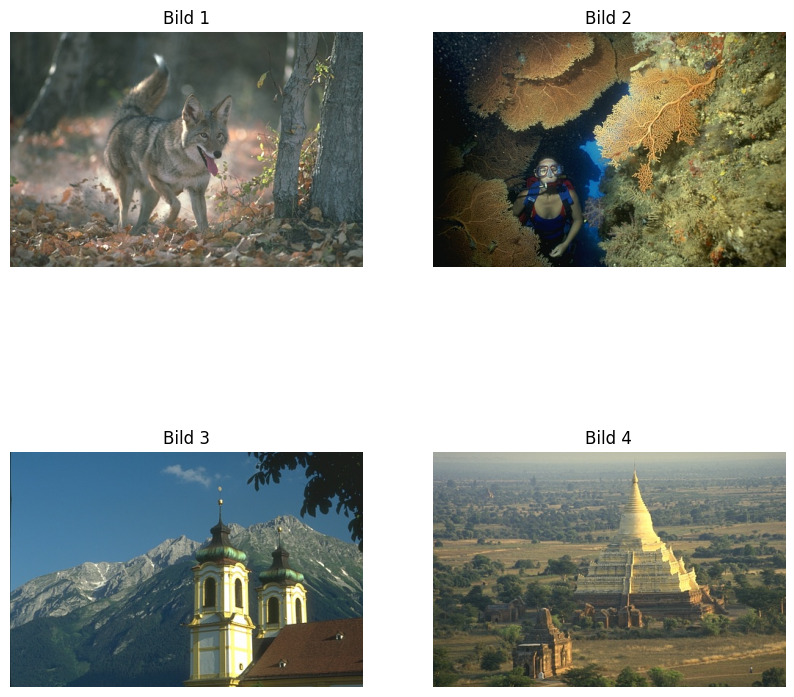

In [13]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Görselleri içeren dizin
image_dir = '/kaggle/input/berkeley-segmentation-dataset-500-bsds500/images/val'  # Beispielpfad, anpassen falls nötig

# Dizin içindeki tüm resim dosyalarını alın (bunların .jpg veya .png dosyaları olduğunu varsayıyoruz)
sample_images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png')) and os.path.isfile(os.path.join(image_dir, f))]

# İlk 4 resmi seçin
sample_images = sample_images[:4]

# Görüntüleri görselleştirme
plt.figure(figsize=(10, 10))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(image_dir, img_name)  # Pfad zum Bild
    img = mpimg.imread(img_path)  # Bild laden
    plt.subplot(2, 2, i+1)  # Anordnung der Bilder (2x2)
    plt.imshow(img)  # Bild anzeigen
    plt.title(f'Bild {i+1}')  # Titel hinzufügen
    plt.axis('off')  # Achsen ausblenden

plt.show()  


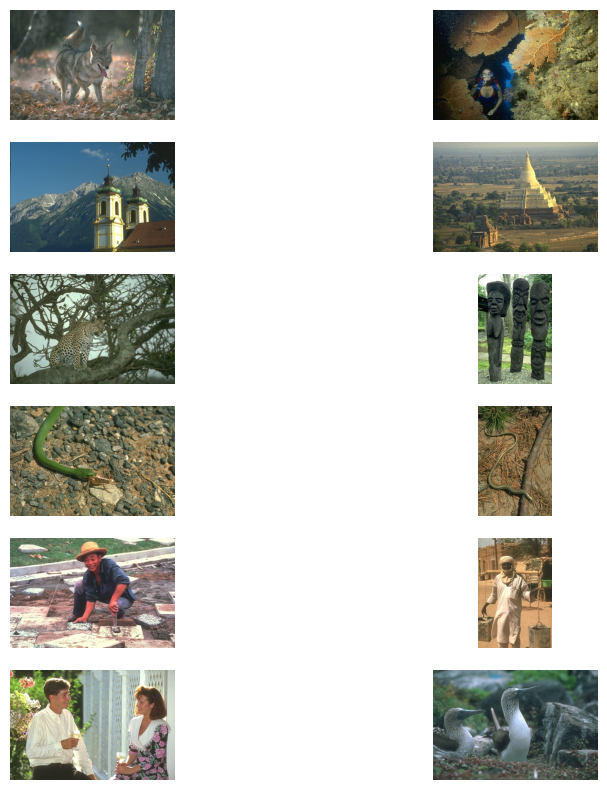

In [14]:
# Görüntüleri içe aktarın ve ilk 12'yi seçin
sample_images = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.png'))][:12]

# Resimler göster
plt.figure(figsize=(10, 10))
for i, img_name in enumerate(sample_images):
    img = mpimg.imread(os.path.join(image_dir, img_name))
    plt.subplot(6, 2, i+1)
    plt.imshow(img)
    plt.axis('off')
plt.show()

In [15]:
import tensorflow as tf

# Veri dizinine giden yol
data_dir = '/kaggle/input/berkeley-segmentation-dataset-500-bsds500'  

# Kayıtları yükle
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, image_size=(128, 128), batch_size=16,
    label_mode='categorical', validation_split=0.2, subset='training', seed=123
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, image_size=(128, 128), batch_size=16,
    label_mode='categorical', validation_split=0.2, subset='validation', seed=123
)

# Sınıf adlarını ve toplu iş sayısını görüntüle
print("Klassennamen:", train_ds.class_names)
print("Anzahl der Trainingsbatches:", tf.data.experimental.cardinality(train_ds).numpy())
print("Anzahl der Validierungsbatches:", tf.data.experimental.cardinality(val_ds).numpy())

Found 500 files belonging to 2 classes.
Using 400 files for training.
Found 500 files belonging to 2 classes.
Using 100 files for validation.
Klassennamen: ['ground_truth', 'images']
Anzahl der Trainingsbatches: 25
Anzahl der Validierungsbatches: 7


In [16]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [17]:
# Örnek: 100 resim, 64x64 piksel, 3 renk kanalı
x_train = np.random.rand(100, 64, 64, 3)
y_train = np.random.randint(0, 2, 100)  # Binäre Labels

In [18]:
# Model olusturmak
model = Sequential()
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation="relu", input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

# Model derlemek
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Şekillerin kontrol edilmesi
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (100, 64, 64, 3)
y_train shape: (100,)


In [19]:
history = model.fit(x_train, y_train, epochs=15, verbose=1)

Epoch 1/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4126 - loss: 0.8206
Epoch 2/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6110 - loss: 0.6735
Epoch 3/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6023 - loss: 0.6395
Epoch 4/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7352 - loss: 0.5897
Epoch 5/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.9753 - loss: 0.5485
Epoch 6/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.6147 - loss: 0.5360
Epoch 7/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8332 - loss: 0.4773
Epoch 8/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9599 - loss: 0.4440
Epoch 9/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.3736
Epoch 10/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8957 - loss: 0.3705
Epoch 11/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9939 - loss: 0.3197
Epoch 12/15
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8980 - loss: 0.3414
E

In [ ]:
# Resim görselleri

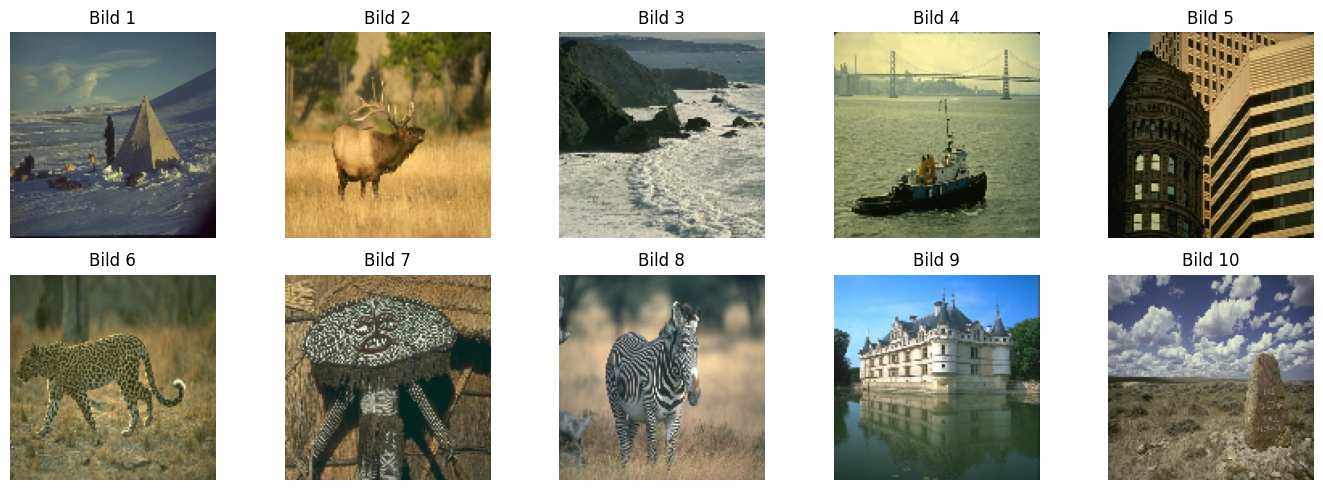

In [55]:
plt.figure(figsize=(14, 5))

# İlk partiden resimleri göster
images, labels = next(iter(train_ds))  # Nehme den ersten Batch

# En fazla 10 resim göster
for i in range(min(10, len(images))):  
    plt.subplot(2, 5, i + 1)  # Position im Subplot
    plt.imshow(images[i].numpy().astype("uint8"))  # Umwandlung in uint8 für die Anzeige
    plt.axis('off')  # Achsen ausblenden
    plt.title(f'Bild {i + 1}')  # Titel hinzufügen

plt.tight_layout()
plt.show()

In [20]:
# CNN modelini oluşturun
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),  # Erste Conv-Schicht
    MaxPooling2D((2, 2)),  # Max-Pooling
    Conv2D(64, (3, 3), activation='relu'),  # Zweite Conv-Schicht
    MaxPooling2D((2, 2)),  # Max-Pooling
    Conv2D(128, (3, 3), activation='relu'),  # Dritte Conv-Schicht
    MaxPooling2D((2, 2)),  # Max-Pooling
    Flatten(),  # Flachlegen der Feature Map
    Dense(128, activation='relu'),  # Dichte Schicht mit 128 Neuronen
    Dense(3, activation='softmax')  # 3 Ausgabeklassen für 3 Klassen
])

# Modeli derleyin
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [62]:
# Modeli eğitin ve geçmişi kaydedin
history = model.fit(train_generator, epochs=15, verbose=1)


Epoch 1/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3561 - loss: 1.7082
Epoch 2/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.3692 - loss: 1.0766
Epoch 3/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.4333 - loss: 1.0561
Epoch 4/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4450 - loss: 1.0663
Epoch 5/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.4695 - loss: 1.0269
Epoch 6/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.5506 - loss: 0.9436
Epoch 7/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.6361 - loss: 0.8585
Epoch 8/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.7319 - loss: 0.6653
Epoch 9/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step - accuracy: 0.7754 - loss: 0.6030
Epoch 10/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.8951 - loss: 0.3806
Epoch 11/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9038 - loss: 0.2817
Epoch 12/15
16/16 ━━━━━━━━━━━━━━━━━━━━ 33s 2s/step - accuracy: 0.9556 - lo

In [63]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 3)                   │             387 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,508,043 (127.82 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,696 (85.22 MB)

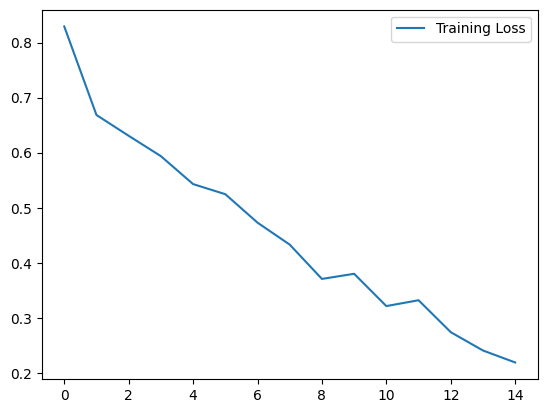

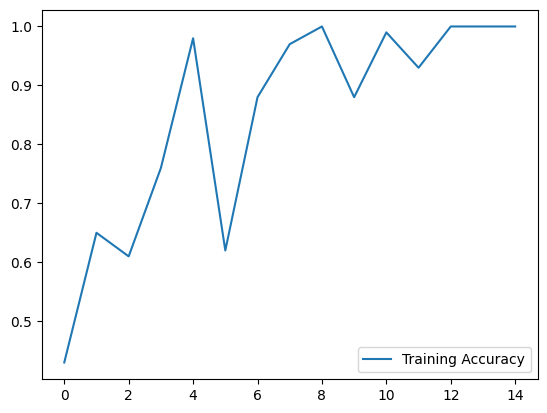

In [21]:
# Kayıp grafiği 
plt.plot(history.history['loss'], label='Training Loss')
# Eğer(val_loss) varsa, onu da çizer. modelin doğrulama verisi üzerindeki performansını gösterir.
if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()
# Doğruluk eğrisi
plt.plot(history.history['accuracy'], label='Training Accuracy')
# (val_accuracy) varsa, onu da çizer.
if 'val_accuracy' in history.history:
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.show()

In [30]:
# Model kayit et
model.save('model.h5')  # Speichert das Modell im HDF5-Format
